In [1]:
import tensorflow as tf

In [19]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [20]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

2
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 

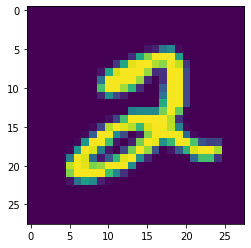

In [10]:
import numpy as np
np.set_printoptions(linewidth=300)
import matplotlib.pyplot as plt
plt.imshow(training_images[5])
print(training_labels[5])
print(training_images[5])

In [21]:
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 261us/sample - loss: 0.2037 - accuracy: 0.9403
Epoch 2/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.0805 - accuracy: 0.9753
Epoch 3/10
60000/60000 [==============================] - 16s 260us/sample - loss: 0.0521 - accuracy: 0.9842
Epoch 4/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.0375 - accuracy: 0.9875
Epoch 5/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9917
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 16s 265us/sample - loss: 0.0258 - accuracy: 0.9917
